# Primera pregunta

Sean $\alpha_1,\alpha_2,\alpha_3$ funciones $\mathbb{R}\to\mathbb{R}$ tales que:
$$
    \alpha(t) = (\alpha_1(t),\alpha_2(t),\alpha_3(t))
    \newcommand{\iprod}[2]{\langle#1,#2\rangle}
$$
para todo $t\in I$. Además, hagamos $v = (v_1,v_2,v_3)$. 

Entonces la derivada de $\iprod{\alpha}{v}$ respecto de $t$ viene dada por:
\begin{align*}
    \iprod{\alpha(t)}{v}' &= \alpha_1'(t)v_1 + \alpha_2'(t)v_2 + \alpha_3'(t)v_3\\
                          &= \iprod{\alpha'(t)}{v}\\
                          &= 0
\end{align*}

Ahora integrando respecto de $t$ en un intervalo cualquiera $(0,x)\in I$, obtenemos:
\begin{align*}
    &\phantom{implies}
    \int_0^x \iprod{\alpha(t)}{v}' \;\mathrm{d}t = \int_0^x \alpha_1'(t)v_1 + \alpha_2'(t)v_2 + \alpha_3'(t)v_3 \;\mathrm{d}t = 0\\
    &\implies 
    v_1\int_0^x \alpha_1'(t) \;\mathrm{d}t + v_2\int_0^x \alpha_2'(t) \;\mathrm{d}t + v_3\int_0^x \alpha_3'(t) \;\mathrm{d}t = 0\\
    &\implies 
    v_1 (\alpha_1(x)-\alpha_1(0)) + v_2 (\alpha_2(x)-\alpha_2(0)) + v_3 (\alpha_3(x)-\alpha_3(0)) = 0 \\
    &\implies
    \iprod{\alpha(x)}{v} - \iprod{\alpha(0)}{v} = 0\\
    &\implies
    \iprod{\alpha(x)}{v} = 0.
\end{align*}

# Segunda Pregunta

## Parametrizada por longitud de arco

Basta con revisar que la norma de $\alpha'$ es $1$, pues en ese caso $s = L(t) = t-t_0$. Para los cálculos usaremos la librería sympy de python.

In [1]:
from sympy import *
from sympy.vector import *
from sympy.plotting import *
import matplotlib

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'grid.alpha': 0.5,
    'figure.autolayout': True,
})

Generemos unos gráficos para ver el trazo de $\alpha$. Primero (en negro) los valores $a = b = 1$, luego (en azul) los valores $a=1/2, b=1$ y por último (en rojo) $a = 1, b = 1/2$.

*Nota:* en el código se usa $r$ en vez de $\alpha$ para hacer más sencilla la escritura.

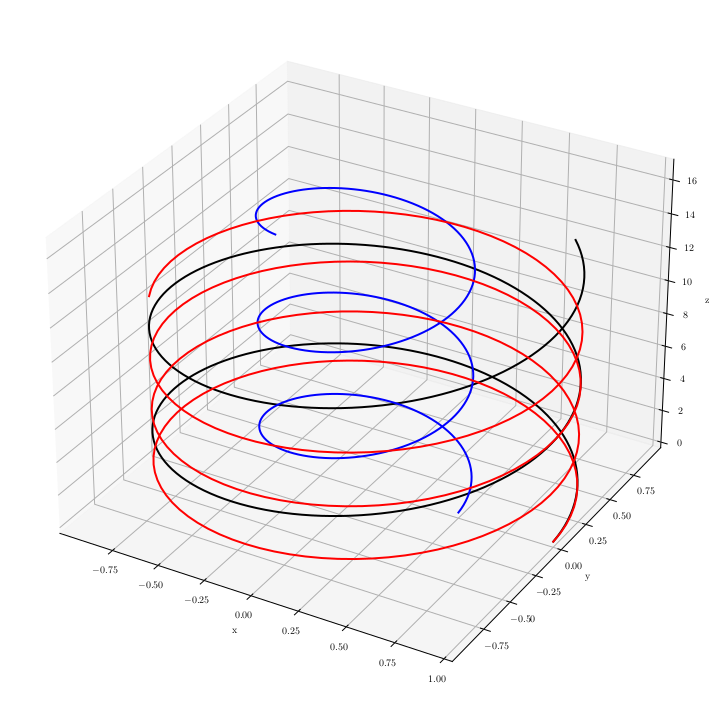

In [171]:
r,a,b,s,x,y,z = symbols('r,a,b,s,x,y,z', real=True)

# Subtitute c = sqrt(a^2+b^2) to make computations simpler
x = a*cos(s/sqrt(a**2+b**2))
y = a*sin(s/sqrt(a**2+b**2))
z = b*s/sqrt(a**2+b**2)

p = plot3d_parametric_line(
    (
        x.subs([(a,1),(b,1)]),
        y.subs([(a,1),(b,1)]),
        z.subs([(a,1),(b,1)]),
        (s,0,6*pi)
    ),
    (
        x.subs([(a,1/2),(b,1)]),
        y.subs([(a,1/2),(b,1)]),
        z.subs([(a,1/2),(b,1)]),
        (s,0,6*pi),
    ),
    (
        x.subs([(a,1),(b,1/2)]),
        y.subs([(a,1),(b,1/2)]),
        z.subs([(a,1),(b,1/2)]),
        (s,0,8*pi),
    ),
    show=False,
    label='Grafico de tres espirales',
)

p[0].line_color='black'
p[1].line_color='blue'
p[2].line_color='red'
p.save('Tarea1_files/Tarea1_5_0.pdf')

Calculemos ahora $\alpha'$.

In [111]:
r = Matrix([x,y,z])

d_r_ds = diff(r,s)
d_r_ds

Matrix([
[-a*sin(s/sqrt(a**2 + b**2))/sqrt(a**2 + b**2)],
[ a*cos(s/sqrt(a**2 + b**2))/sqrt(a**2 + b**2)],
[                          b/sqrt(a**2 + b**2)]])

Podemos obtener su norma y simplificar.

In [112]:
norm_d_r_ds = sqrt(d_r_ds.dot(d_r_ds))
norm_d_r_ds

sqrt(a**2*sin(s/sqrt(a**2 + b**2))**2/(a**2 + b**2) + a**2*cos(s/sqrt(a**2 + b**2))**2/(a**2 + b**2) + b**2/(a**2 + b**2))

In [113]:
simplify(norm_d_r_ds)

1

Con lo que la norma es $1$, que es lo que queríamos demostrar.

## Curvatura y torsión

La curvatura es la norma de la derivada segunda de $\alpha$ con respecto de $s$. Primero calculamos $\alpha''$ y luego su norma:

In [114]:
d_r_dss = diff(d_r_ds,s)
d_r_dss

Matrix([
[-a*cos(s/sqrt(a**2 + b**2))/(a**2 + b**2)],
[-a*sin(s/sqrt(a**2 + b**2))/(a**2 + b**2)],
[                                        0]])

In [115]:
norm_d_r_dss = sqrt(d_r_dss.dot(d_r_dss))
norm_d_r_dss

sqrt(a**2*sin(s/sqrt(a**2 + b**2))**2/(a**2 + b**2)**2 + a**2*cos(s/sqrt(a**2 + b**2))**2/(a**2 + b**2)**2)

In [116]:
simplify(norm_d_r_dss)

Abs(a)/(a**2 + b**2)

La expresión anterior nos da la curvatura de $\alpha$.

La torsión es el múltiplo escalar por el que diferen el vector normal y la primera derivada del vector binormal. Podemos comparar ambos vectores para conseguir ese múltiplo. Calculamos primero el vector normal:

In [117]:
norm_d_r_dss = simplify(norm_d_r_dss)
n = d_r_dss/norm_d_r_dss
n

Matrix([
[-a*cos(s/sqrt(a**2 + b**2))/Abs(a)],
[-a*sin(s/sqrt(a**2 + b**2))/Abs(a)],
[                                 0]])

Calculamos ahora el vector tangente usando la primera derivada:

In [118]:
norm_d_r_ds = simplify(norm_d_r_ds)
t = d_r_ds/norm_d_r_ds
t

Matrix([
[-a*sin(s/sqrt(a**2 + b**2))/sqrt(a**2 + b**2)],
[ a*cos(s/sqrt(a**2 + b**2))/sqrt(a**2 + b**2)],
[                          b/sqrt(a**2 + b**2)]])

Podemos entonces calcular el vector binormal y simplificarlo:

In [119]:
bi = t.cross(n)
bi

Matrix([
[                                                                  a*b*sin(s/sqrt(a**2 + b**2))/(sqrt(a**2 + b**2)*Abs(a))],
[                                                                 -a*b*cos(s/sqrt(a**2 + b**2))/(sqrt(a**2 + b**2)*Abs(a))],
[a**2*sin(s/sqrt(a**2 + b**2))**2/(sqrt(a**2 + b**2)*Abs(a)) + a**2*cos(s/sqrt(a**2 + b**2))**2/(sqrt(a**2 + b**2)*Abs(a))]])

In [120]:
simplify(bi)

Matrix([
[ a*b*sin(s/sqrt(a**2 + b**2))/(sqrt(a**2 + b**2)*Abs(a))],
[-a*b*cos(s/sqrt(a**2 + b**2))/(sqrt(a**2 + b**2)*Abs(a))],
[                         a**2/(sqrt(a**2 + b**2)*Abs(a))]])

Solo falta la derivada del vector binormal:

In [121]:
bi = simplify(bi)
d_bi_ds = diff(bi,s)
d_bi_ds

Matrix([
[a*b*cos(s/sqrt(a**2 + b**2))/((a**2 + b**2)*Abs(a))],
[a*b*sin(s/sqrt(a**2 + b**2))/((a**2 + b**2)*Abs(a))],
[                                                  0]])

Podemos entonces comparar $b'$ con $n$:

In [122]:
display(Eq(d_bi_ds,n))

Eq(Matrix([
[a*b*cos(s/sqrt(a**2 + b**2))/((a**2 + b**2)*Abs(a))],
[a*b*sin(s/sqrt(a**2 + b**2))/((a**2 + b**2)*Abs(a))],
[                                                  0]]), Matrix([
[-a*cos(s/sqrt(a**2 + b**2))/Abs(a)],
[-a*sin(s/sqrt(a**2 + b**2))/Abs(a)],
[                                 0]]))

De donde podemos ver que la torsión es:
$$
    \frac{b}{a^2+b^2}
$$

## Plano osculante

En la ecuación del plano en el punto $s = (s_1,s_2,s_3)$:
$$
    a (x-s_1) + b (y-s_2) + c(z-s_3),
$$
los coeficientes $a,b,c$ coinciden con los del vector normal:

In [123]:
n

Matrix([
[-a*cos(s/sqrt(a**2 + b**2))/Abs(a)],
[-a*sin(s/sqrt(a**2 + b**2))/Abs(a)],
[                                 0]])

# Tercera pregunta

Veamos primero el trazo de la curva $\alpha$.

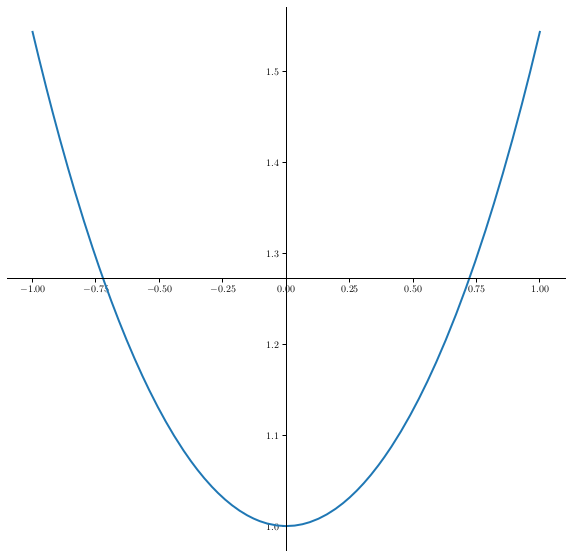

In [165]:
matplotlib.rcParams.update({
    'lines.linewidth': 2,
})

t = symbols('t', real=True)

x = t
y = cosh(t)

p2 = plot_parametric(
    (x, y, (t, -1, 1)),
    label='Catenaria',
    show=False,
)

p2.save('Tarea1_files/Tarea1_33_0.pdf')

## Parametrización por longitud de arco

Calculamos primero $\alpha'$:

In [125]:
r = Matrix([x,y])
d_r_dt = diff(r,t)
d_r_dt

Matrix([
[      1],
[sinh(t)]])

Luego, su norma:

In [126]:
norm_d_r_dt = sqrt(d_r_dt.dot(d_r_dt))
norm_d_r_dt

sqrt(sinh(t)**2 + 1)

In [127]:
simplify(norm_d_r_dt)

cosh(t)

Como $\cosh$ es siempre positiva calcular la longitud de arco equivale a integrar la función $\cosh(t)$ en el intervalo $(0,t)$ que es conveniente puesto que $\sinh(0)=0$.

In [128]:
u = symbols('u', real=True)
integrate(cosh(u), (u,0,t))

sinh(t)

Podemos entonces despejar $t$ en función de $s$ usando la inversa del seno hiperbólico.

In [129]:
display(Eq(t,asinh(s)))

Eq(t, asinh(s))

La reparametrización por longitud de arco viene dada entonces por $\alpha(L^{-1}(s))$:

In [130]:
r_by_arc_length = r.subs(t,asinh(s))
r_by_arc_length

Matrix([
[      asinh(s)],
[sqrt(s**2 + 1)]])

Podemos revisar rápidamente que la norma de la derivada es $1$:

In [131]:
d_r_by_arc_length_ds = diff(r_by_arc_length, s)
d_r_by_arc_length_ds

Matrix([
[1/sqrt(s**2 + 1)],
[s/sqrt(s**2 + 1)]])

In [132]:
simplify(sqrt(d_r_by_arc_length_ds.dot(d_r_by_arc_length_ds)))

1

## Curvatura

Como $\alpha$ ya esta parametrizada por longitud de arco, basca con ver el módulo de su segunda derivada:

In [133]:
d_r_by_arc_length_dss = diff(r_by_arc_length_ds, s)
d_r_by_arc_length_dss

Matrix([
[                      -s/(s**2 + 1)**(3/2)],
[-s**2/(s**2 + 1)**(3/2) + 1/sqrt(s**2 + 1)]])

In [134]:
norm_d_r_by_arc_length_dss = sqrt(d_r_by_arc_length_dss.dot(d_r_by_arc_length_dss))

In [135]:
kappa = symbols('kappa')
display(Eq(kappa,simplify(norm_d_r_by_arc_length_dss)))

Eq(kappa, 1/(s**2 + 1))